In [106]:
import os
import pandas as pd
import numpy as np
from gensim.models.doc2vec import Doc2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [5]:
model_path = "../experiments/workflow/wandb/offline-run-20230904_100533-22rg0wdz/tmp/"
model = Doc2Vec.load(os.path.join(model_path, "embedding_model.pt"))

In [6]:
mof_emb = pd.read_csv(os.path.join(model_path, "embedding_dv.csv"))

In [7]:
df_label = pd.read_csv("../data/arc-merge.csv")

In [9]:
geo_name = ["ASA", "AVA", "POAVAf", "Di"]
geo = ["%s_%s" %(n, i) for i in range(10) for n in geo_name]
topo = np.unique(df_label["Crystalnet"])

In [22]:
feat_emb = np.array([model.wv[k] for k in geo+list(topo)])

In [76]:
feat_idx = {feat: i+num_mof for i, feat in enumerate(geo+list(topo))}

In [23]:
all_emb = np.concatenate((mof_emb.loc[:,mof_emb.columns!="type"].values, feat_emb), axis=0)

In [24]:
mof_emb.loc[:,mof_emb.columns!="type"].values.shape, feat_emb.shape, all_emb.shape

((22035, 1000), (54, 1000), (22089, 1000))

In [28]:
num_mof = len(mof_emb)

In [27]:
tsne_obj = TSNE(n_components=2, perplexity=30.0, random_state=40)
emb_2d = tsne_obj.fit_transform(all_emb)

In [42]:
mof_emb

type       x_0       x_1       x_2  \
0        DB0-m29_o88_o470_f0_pts.sym.43_repeat  0.013155 -0.031849 -0.020570   
1        DB0-m29_o88_o470_f0_pts.sym.44_repeat  0.010653 -0.029251 -0.021887   
2        DB0-m29_o88_o470_f0_pts.sym.45_repeat  0.011603 -0.026796 -0.018161   
3        DB0-m29_o88_o470_f0_pts.sym.46_repeat  0.012335 -0.031960 -0.015512   
4        DB0-m29_o88_o470_f0_pts.sym.47_repeat  0.008700 -0.025368 -0.021059   
...                                        ...       ...       ...       ...   
22030  DB1-Zn2O8-irmof14_A-mof177_No345_repeat  0.025049 -0.040725 -0.062466   
22031  DB1-Zn2O8-irmof14_A-mof177_No358_repeat  0.010433  0.020470 -0.028197   
22032   DB1-Zn2O8-irmof14_A-mof180_No20_repeat -0.002732 -0.000156 -0.063446   
22033  DB1-Zn2O8-irmof14_A-pcn6_A_No113_repeat  0.021001 -0.075027 -0.100942   
22034   DB1-Zn2O8-irmof14_A-pcn6_A_No15_repeat  0.030940 -0.065935 -0.091373   

            x_3       x_4       x_5       x_6       x_7       x_8  ...  \
0     -0.013266 -0.030977 -0.001476 -0.001347 -0.013906  0.007664  ...   
1     -0.014152 -0.023959 -0.002053  0.001337 -0.019049  0.005699  ...   
2     -0.010929 -0.022369 -0.002218  0.005185 -0.019291  0.005962  ...   
3     -0.011901 -0.020445 -0.001947  0.001524 -0.016522  0.005790  ...   
4     -0.011766 -0.020863 -0.006360  0.001791 -0.014262  0.002175  ...   
...         ...       ...       ...       ...       ...       ...  ...   
22030 -0.024482 -0.057101 -0.012153 -0.004151 -0.047517 -0.011058  ...   
22031 -0.014741 -0.027395 -0.001330 -0.030826 -0.036052 -0.023908  ...   
22032 -0.014966 -0.039154 -0.007860 -0.033865 -0.019422 -0.047682  ...   
22033 -0.039202 -0.077026 -0.016248 -0.005343 -0.058282 -0.030438  ...   
22034 -0.017987 -0.067242 -0.016498  0.013336 -0.051099 -0.009177  ...   

          x_990     x_991     x_992     x_993     x_994     x_995     x_996  \
0     -0.008837  0.002204  0.003920  0.001227 -0.011583 -0.004337  0.006154   
1     -0.013396  0.009522 -0.004177  0.012227 -0.008932  0.001087  0.001423   
2     -0.005987  0.011826 -0.002266  0.013972 -0.010590  0.003080  0.002087   
3     -0.008693  0.011942 -0.002476  0.012170 -0.009517  0.000112  0.001006   
4     -0.010196  0.016892  0.005421  0.010344 -0.014079  0.005958  0.008427   
...         ...       ...       ...       ...       ...       ...       ...   
22030 -0.044148  0.023999 -0.010928  0.035589 -0.029600  0.003037  0.012255   
22031 -0.018010 -0.037339 -0.004417  0.000849 -0.013085  0.009290  0.002622   
22032 -0.071476  0.008364 -0.007963  0.006706 -0.027527 -0.012632  0.020966   
22033 -0.080597  0.053192 -0.014712  0.049925 -0.052688 -0.004797  0.031374   
22034 -0.069666  0.039130 -0.012281  0.057311 -0.036853 -0.012229  0.021743   

          x_997     x_998     x_999  
0     -0.037779 -0.015337  0.004112  
1     -0.031217 -0.021835  0.000758  
2     -0.026147 -0.013413 -0.005368  
3     -0.030232 -0.016303 -0.005257  
4     -0.025966 -0.014653 -0.011285  
...         ...       ...       ...  
22030 -0.069658 -0.039194  0.025882  
22031 -0.019363 -0.039971  0.072899  
22032 -0.055332 -0.029242  0.049099  
22033 -0.107188 -0.058870  0.026107  
22034 -0.093723 -0.043971  0.012715  

[22035 rows x 1001 columns]

In [43]:
df_label["info.name"]

0        DB0-m29_o99_o470_f0_pts.sym.128_repeat
1          DB0-m29_o99_o52_f0_pts.sym.17_repeat
2         DB0-m29_o96_o110_f0_pts.sym.44_repeat
3           DB0-m3_o11_o22_f0_pcu.sym.15_repeat
4           DB0-m3_o11_o22_f0_nbo.sym.66_repeat
                          ...                  
22030     DB0-m29_o97_o148_f0_pts.sym.68_repeat
22031     DB0-m29_o89_o500_f0_pts.sym.44_repeat
22032     DB0-m29_o96_o420_f0_pts.sym.90_repeat
22033     DB0-m29_o90_o530_f0_pts.sym.68_repeat
22034    DB0-m29_o90_o1530_f0_pts.sym.94_repeat
Name: info.name, Length: 22035, dtype: object

In [41]:
mof_topo = [df_label[df_label["info.name"]==n]["Crystalnet"].values[0] for n in mof_emb["type"]]

In [54]:
mof_emb["Crystalnet"] = mof_topo

In [69]:
color_list = ["blue", "orange", "pink", "green", "yellow", "red", "purple", 
              "black", "brown", "tab:grey", "tab:cyan", "hotpink", "gold", "coral"]

In [77]:
topo

array(['bbi', 'cdn', 'cds', 'cdz', 'fsc', 'kto', 'mog', 'mou', 'nbo',
       'pcu', 'pts', 'sqc', 'tbo', 'tfz'], dtype=object)

In [70]:
topo_color = {t:c for t, c in zip(topo, color_list)}

In [71]:
topo_color

{'bbi': 'blue',
 'cdn': 'orange',
 'cds': 'pink',
 'cdz': 'green',
 'fsc': 'yellow',
 'kto': 'red',
 'mog': 'purple',
 'mou': 'black',
 'nbo': 'brown',
 'pcu': 'tab:grey',
 'pts': 'tab:cyan',
 'sqc': 'hotpink',
 'tbo': 'gold',
 'tfz': 'coral'}

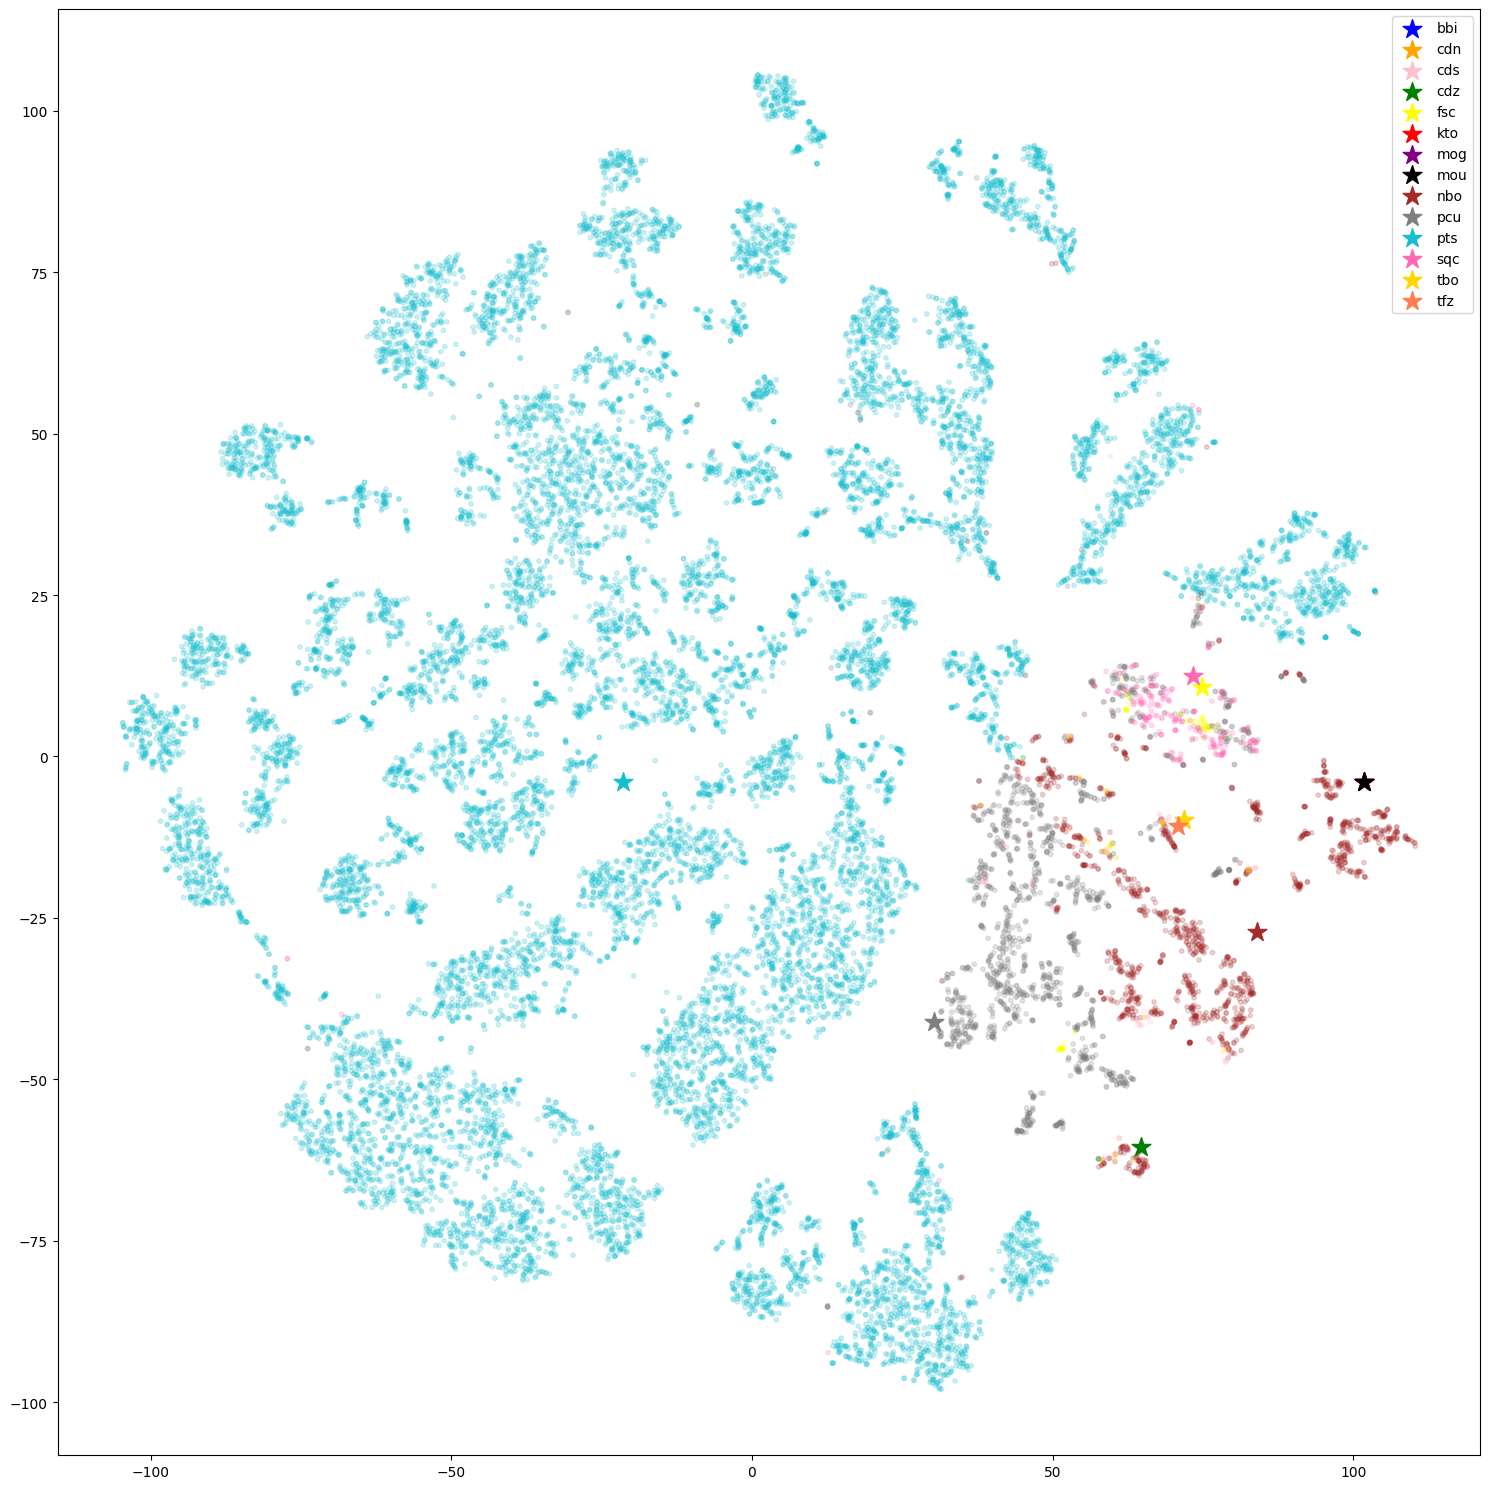

In [86]:
plt.figure(figsize=(15,15))
plt.scatter(emb_2d[:num_mof, 0], emb_2d[:num_mof, 1], c=mof_emb["Crystalnet"].map(topo_color), s=10, alpha=.2)

for t in topo:
    plt.scatter(emb_2d[feat_idx[t], 0], emb_2d[feat_idx[t], 1], c=topo_color[t], marker="*", label=t, s=200)
    
plt.legend()
plt.tight_layout()
#plt.savefig("../../../files/topo_cluster.png", dpi=1200)

In [87]:
Di = [df_label[df_label["info.name"]==n]["Di"].values[0] for n in mof_emb["type"]]
mof_emb["Di"] = Di

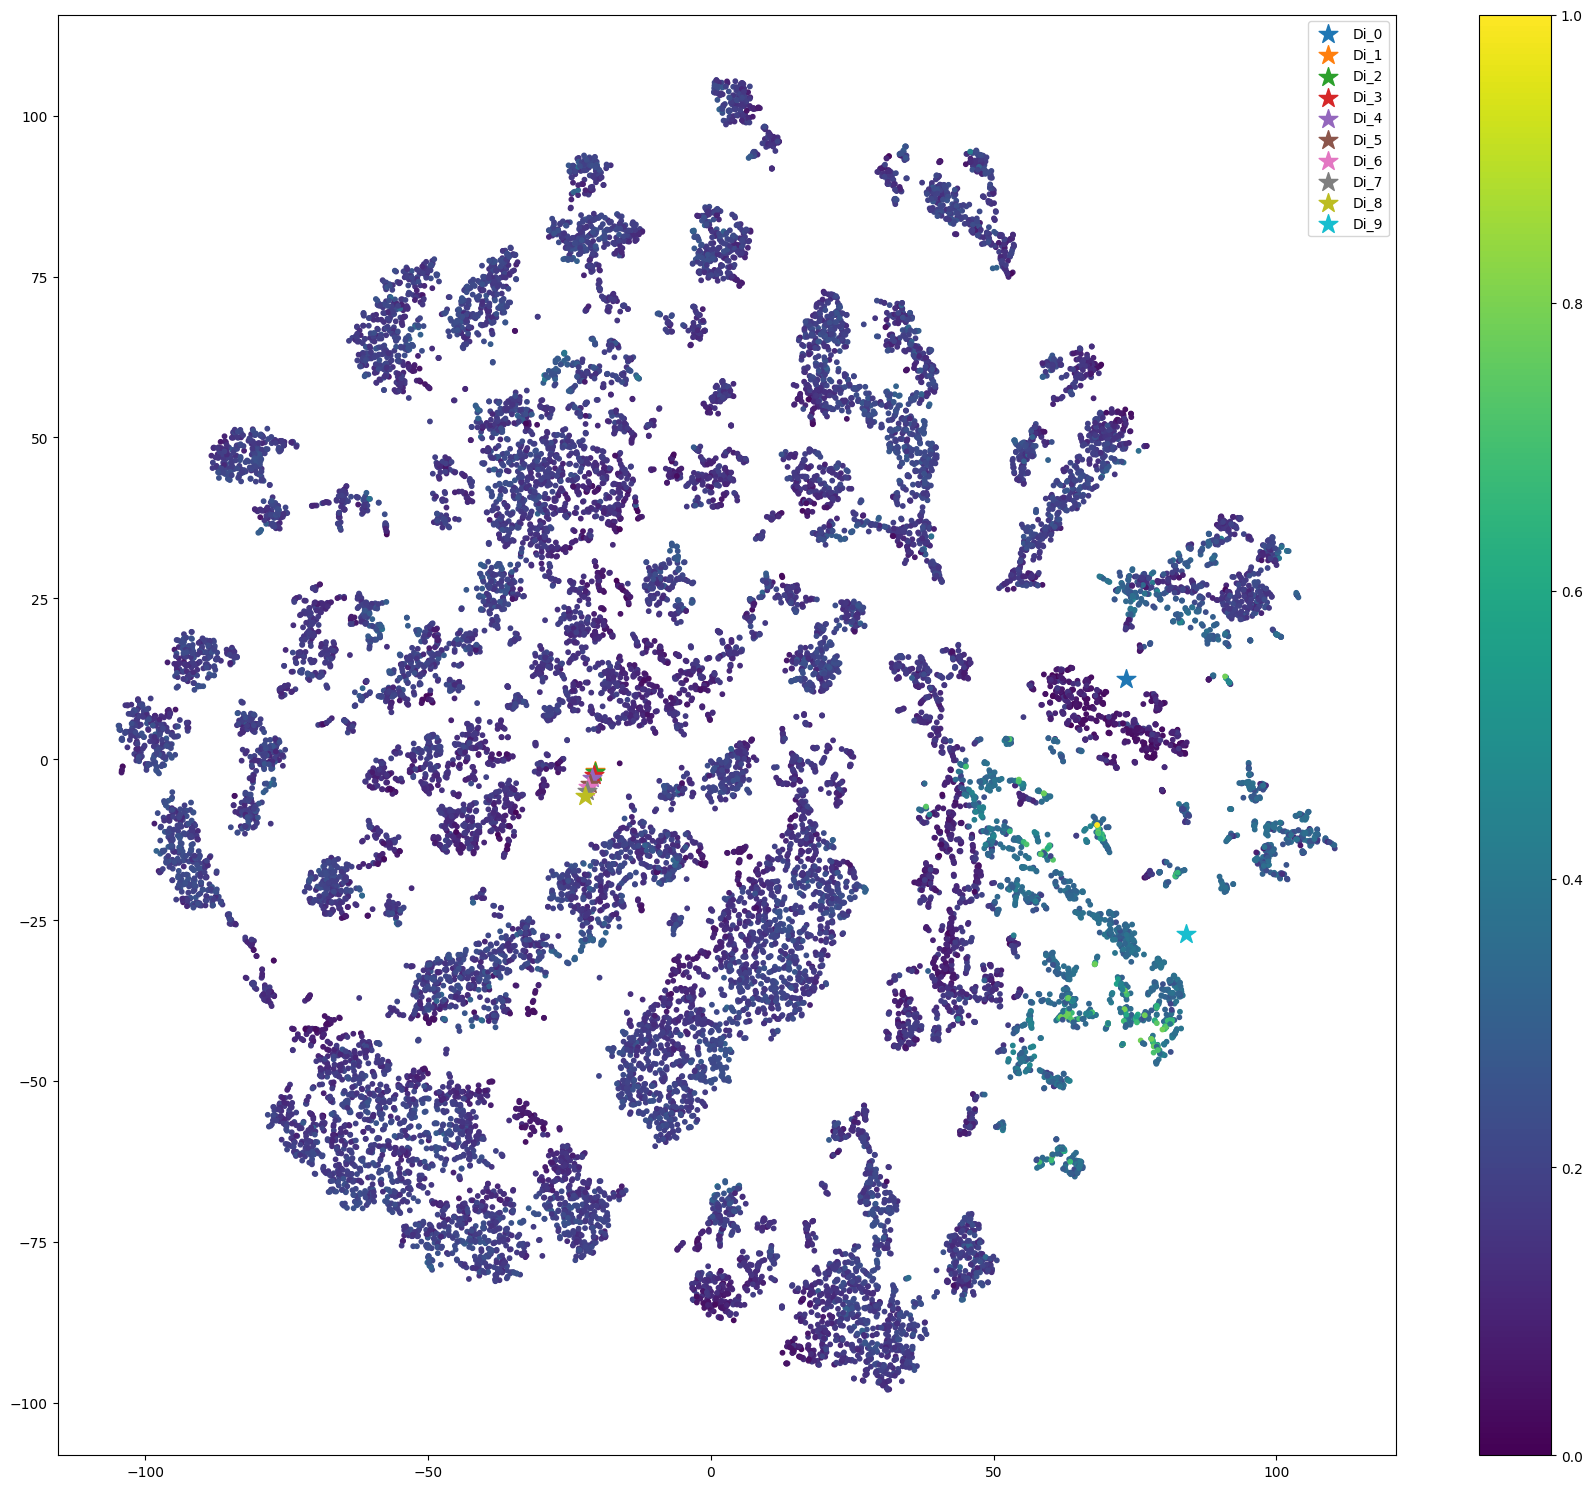

In [101]:
plt.figure(figsize=(17.5,15))
plt.scatter(emb_2d[:num_mof, 0], emb_2d[:num_mof, 1], c=mof_emb["Di"], s=10)

for i in range(10):
    feat = "Di_%s" %i
    plt.scatter(emb_2d[feat_idx[feat],0], emb_2d[feat_idx[feat],1], marker="*", label=feat, s=200)

plt.colorbar()
plt.legend()
plt.tight_layout()

In [94]:
density = [df_label[df_label["info.name"]==n]["info.density"].values[0] for n in mof_emb["type"]]
mof_emb["info.density"] = density

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


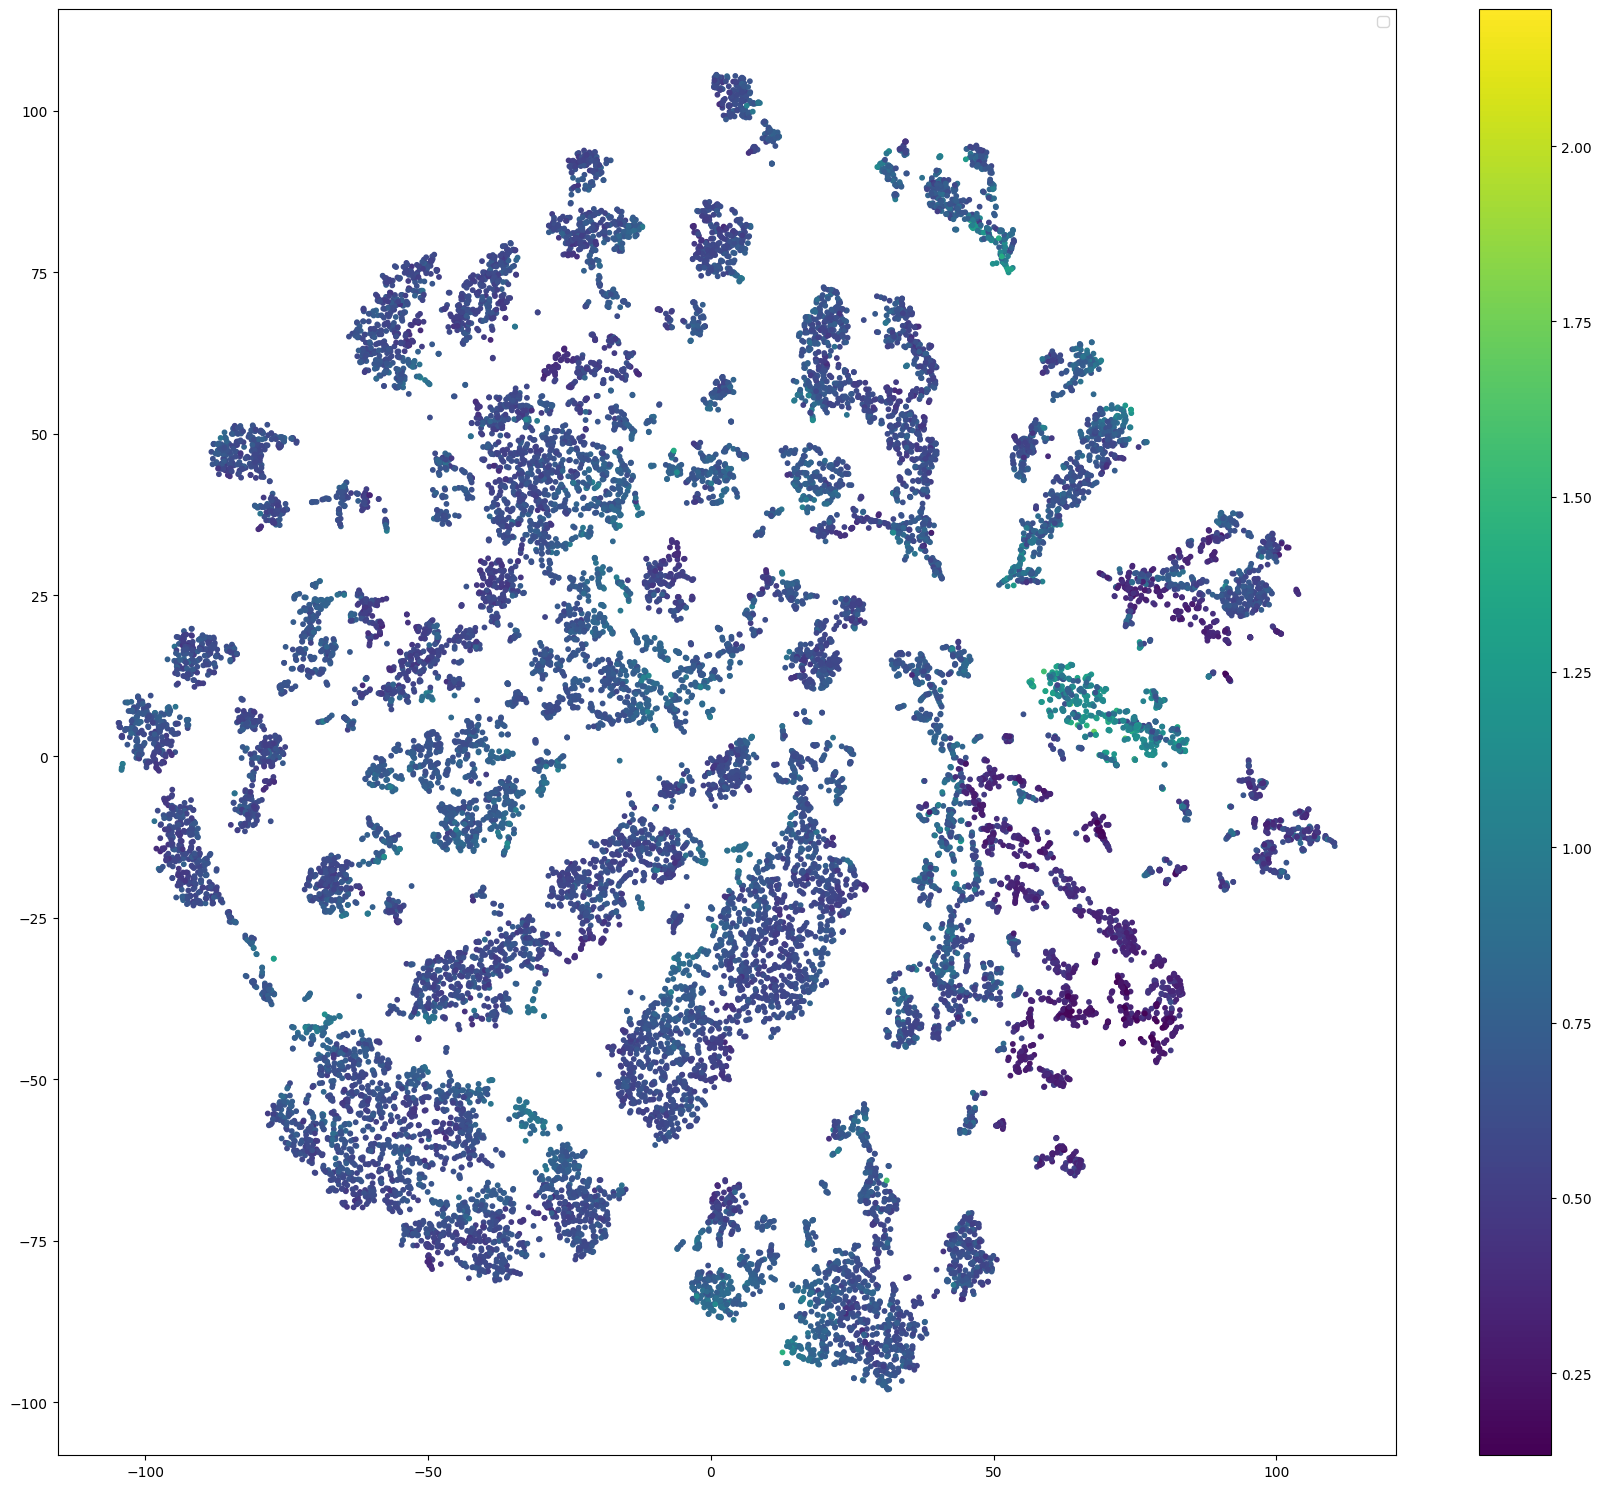

In [95]:
plt.figure(figsize=(17.5,15))
plt.scatter(emb_2d[:num_mof, 0], emb_2d[:num_mof, 1], c=mof_emb["info.density"], s=10)

for i in range(10):
    feat = "AVA_%s" %i
    plt.scatter(emb_2d[feat_idx[feat],0], emb_2d[feat_idx[feat],1], marker="*", label=feat, s=200)


plt.colorbar()
plt.legend()
plt.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


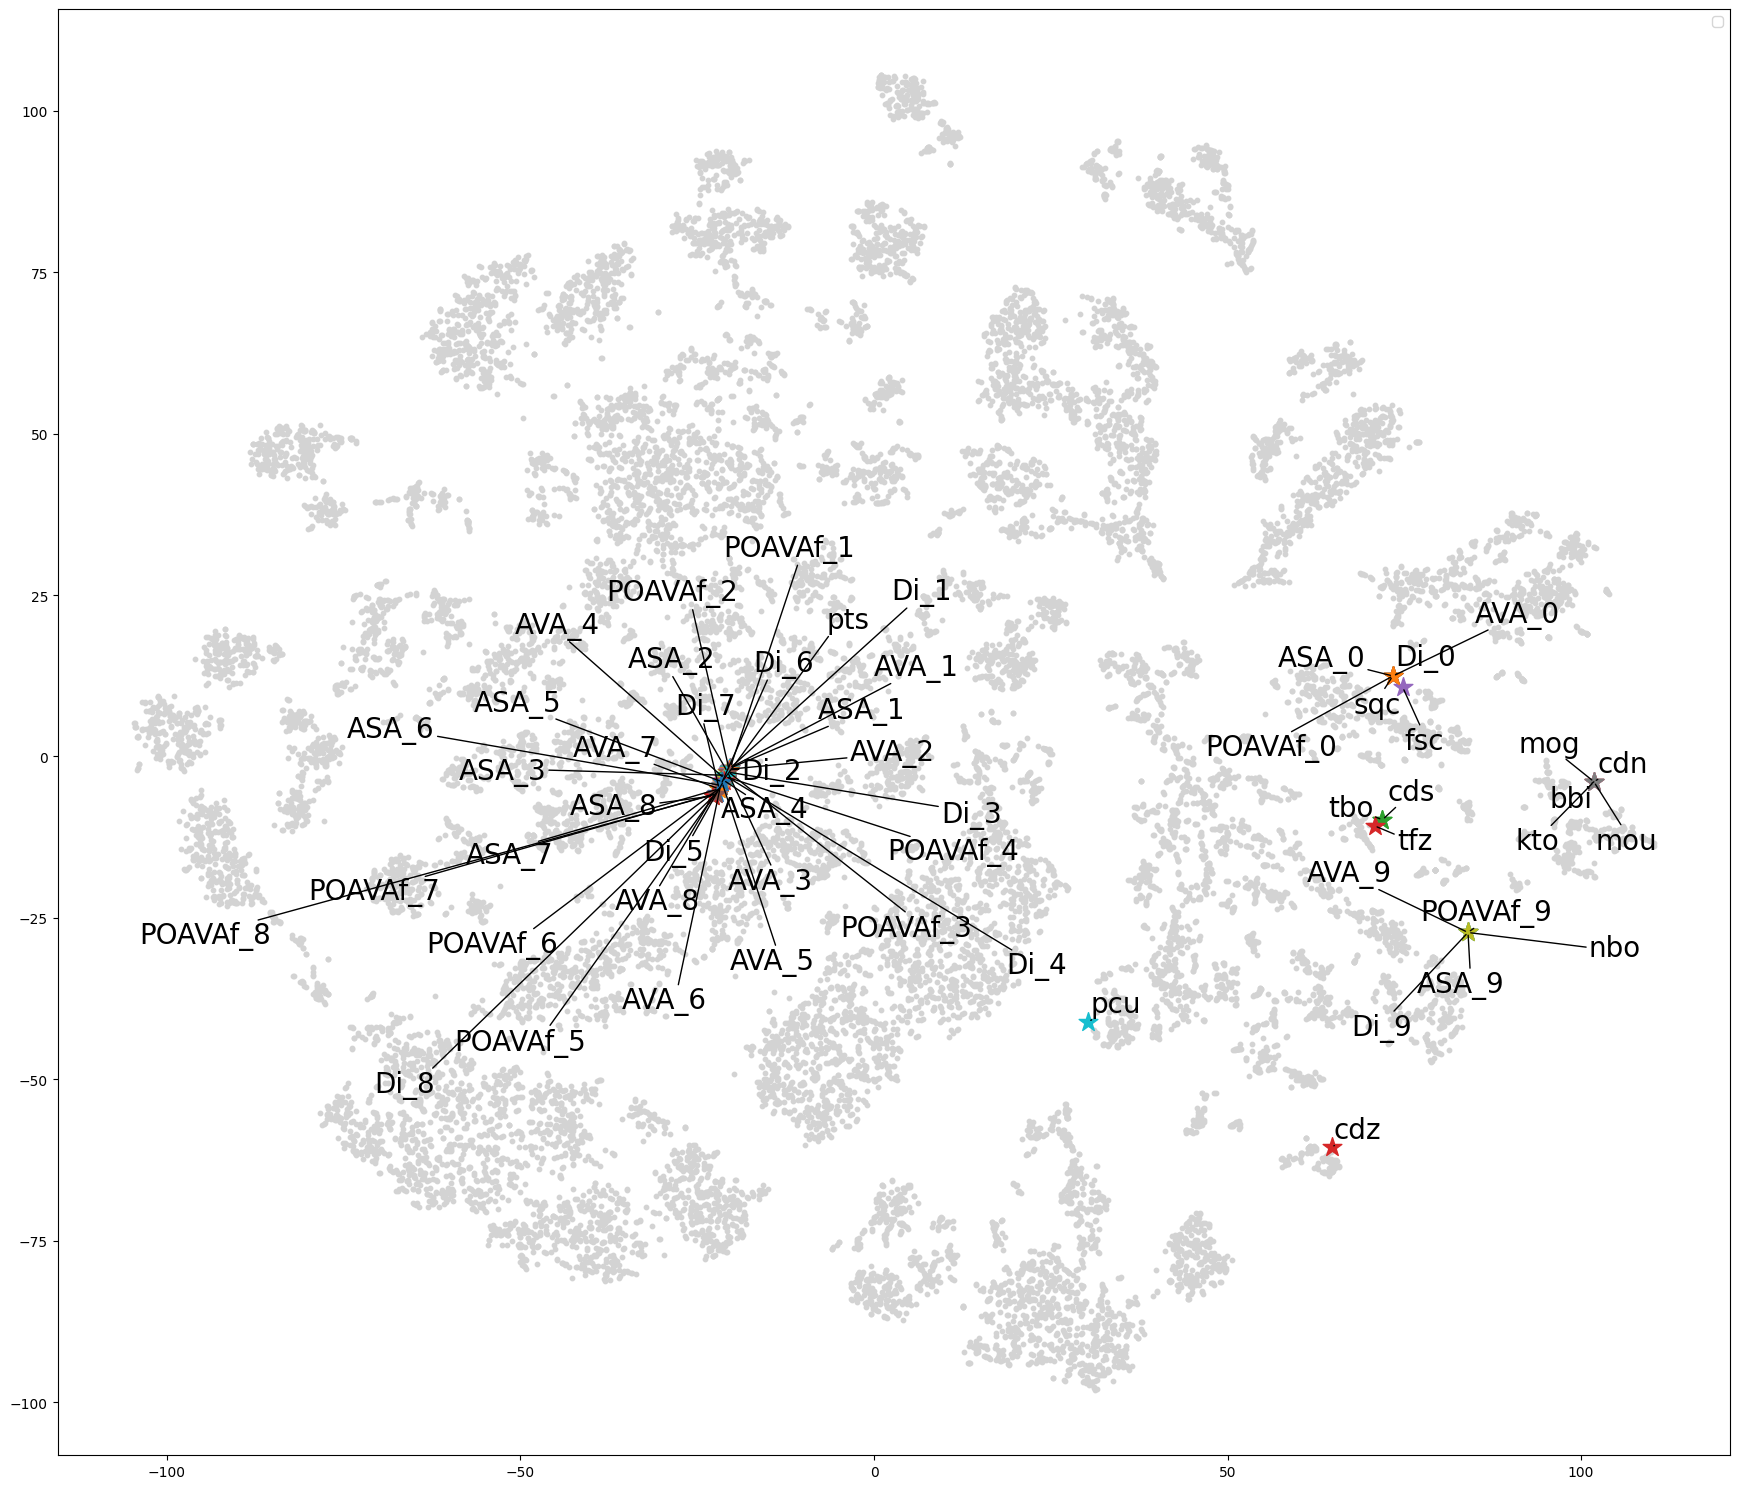

In [132]:
plt.figure(figsize=(17.5,15))
plt.scatter(emb_2d[:num_mof, 0], emb_2d[:num_mof, 1], c="lightgrey", s=10)

texts = []
for feat in feat_idx:
    plt.scatter(emb_2d[feat_idx[feat],0], emb_2d[feat_idx[feat],1], marker="*", s=200)
    texts.append(plt.annotate(feat, (emb_2d[feat_idx[feat],0], emb_2d[feat_idx[feat],1]), fontsize=20))

adjust_text(texts, arrowprops=dict(arrowstyle='-'))
#plt.colorbar()
plt.legend()
plt.tight_layout()

In [110]:
feat_2d = tsne_obj.fit_transform(feat_emb)

15

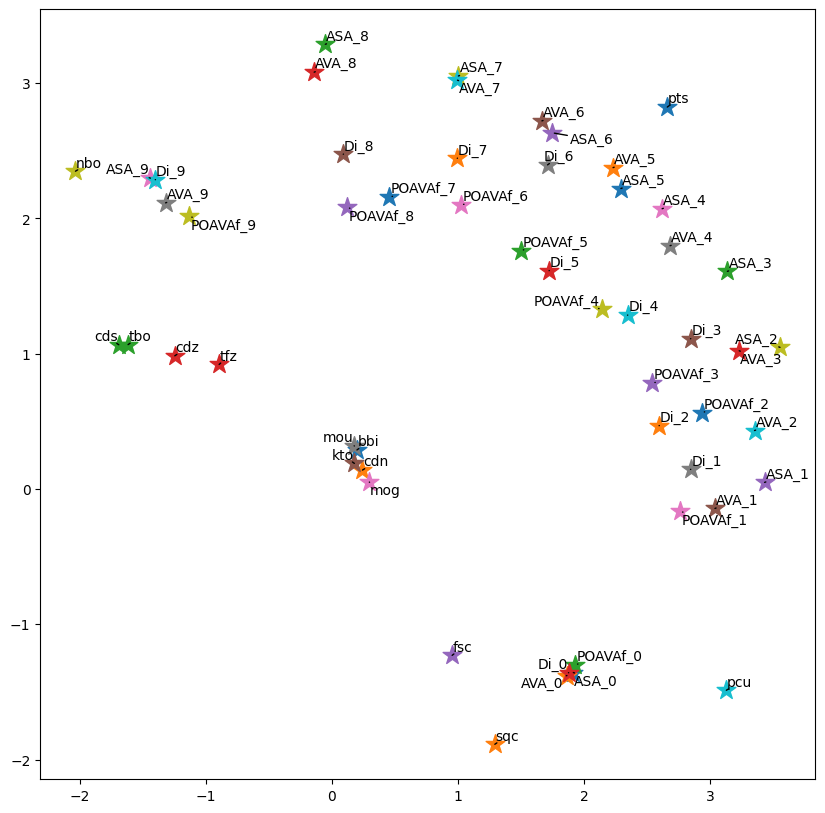

In [114]:
plt.figure(figsize=(10,10))
texts = []
for feat in feat_idx:
    plt.scatter(feat_2d[feat_idx[feat]-num_mof,0], feat_2d[feat_idx[feat]-num_mof,1], marker="*", s=200)
    texts.append(plt.annotate(feat, (feat_2d[feat_idx[feat]-num_mof,0], feat_2d[feat_idx[feat]-num_mof,1]), fontsize=10))

adjust_text(texts, arrowprops=dict(arrowstyle='-'))

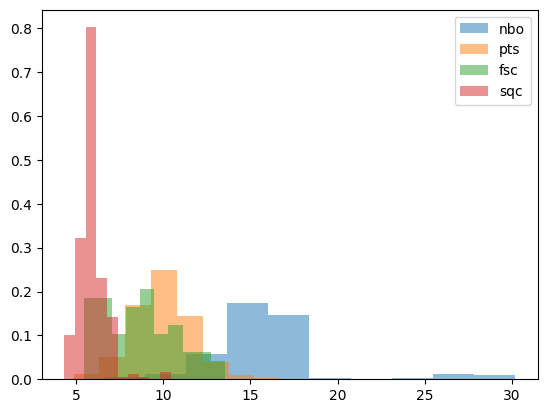

In [130]:
plt.hist(mof_emb[mof_emb["Crystalnet"] == "nbo"]["Di"], alpha=.5, label="nbo", density=True)
plt.hist(mof_emb[mof_emb["Crystalnet"] == "pts"]["Di"], alpha=.5, label="pts", density=True)
plt.hist(mof_emb[mof_emb["Crystalnet"] == "fsc"]["Di"], alpha=.5, label="fsc", density=True)
plt.hist(mof_emb[mof_emb["Crystalnet"] == "sqc"]["Di"], alpha=.5, label="sqc", density=True)
plt.legend()

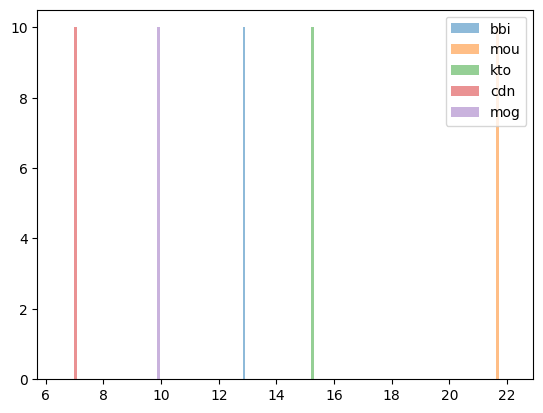

In [124]:
plt.hist(mof_emb[mof_emb["Crystalnet"] == "bbi"]["Di"], alpha=.5, label="bbi", density=True)
plt.hist(mof_emb[mof_emb["Crystalnet"] == "mou"]["Di"], alpha=.5, label="mou", density=True)
plt.hist(mof_emb[mof_emb["Crystalnet"] == "kto"]["Di"], alpha=.5, label="kto", density=True)
plt.hist(mof_emb[mof_emb["Crystalnet"] == "cdn"]["Di"], alpha=.5, label="cdn", density=True)
plt.hist(mof_emb[mof_emb["Crystalnet"] == "mog"]["Di"], alpha=.5, label="mog", density=True)
plt.legend()

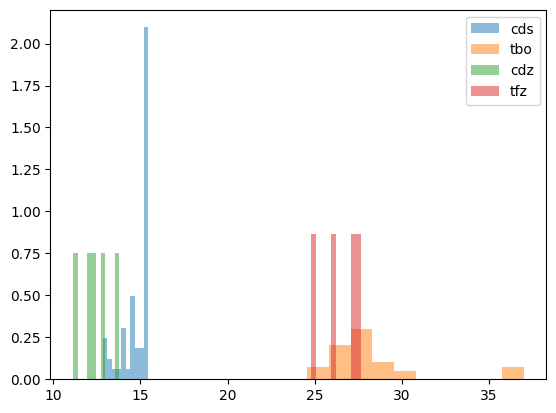

In [127]:
plt.hist(mof_emb[mof_emb["Crystalnet"] == "cds"]["Di"], alpha=.5, label="cds", density=True)
plt.hist(mof_emb[mof_emb["Crystalnet"] == "tbo"]["Di"], alpha=.5, label="tbo", density=True)
plt.hist(mof_emb[mof_emb["Crystalnet"] == "cdz"]["Di"], alpha=.5, label="cdz", density=True)
plt.hist(mof_emb[mof_emb["Crystalnet"] == "tfz"]["Di"], alpha=.5, label="tfz", density=True)
plt.legend()